In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import gym
import numpy as np
import lspi
from lib.envs.mountain_car import MountainCarEnv

In [3]:
solver = lspi.solvers.LSTDQSolver()
# Define the Basis. This expects a Matrix with the shape of #state_features X #state_features
# in this example MountainCarEnv has two state features -> list of two numpy arrays of shape (2, )
init_pol = lspi.Policy(lspi.basis_functions.RadialBasisFunction([np.array([0,0]), np.array([0,0])], 15, 3), 0.99, 0.1)

env = MountainCarEnv()
max_steps_per_eps = 1200
episodes = 5000
rewards = []
lengths = []
for i in range(episodes):
    obs = env.reset()

    samples = [] # collect observations of each episode ...[*]
    done = False
    c_reward = 0
    steps = 0
    while not done:
#         env.render()  # commented to speed up training
        act = init_pol.select_action(obs)
        nobs, r, done, info = env.step(act)
        c_reward += r
        samples.append(lspi.Sample(obs, act, r, nobs, done))
        obs = nobs
        steps += 1
        if steps >= max_steps_per_eps:
            break
    rewards.append(c_reward)
    lengths.append(steps)
    print('{:>6d}: {:>7.1f}'.format(i, c_reward))
    # [*]... to immediately learn from the trajectory of the episode
    init_pol = lspi.learn(samples, init_pol, solver)
env.close()

     0:    -9.1
     1:   -74.3
     2:  -121.0
     3:   -20.3
     4:  -122.5
     5:  -120.9
     6:  -118.0
     7:  -137.6
     8:    -8.2
     9:   -11.3
    10:    -3.0
    11:   -33.5
    12:  -141.1
    13:   -14.0
    14:  -120.7
    15:   -26.6
    16:  -139.7
    17:    -7.0
    18:  -121.9
    19:   -12.8
    20:    -4.9
    21:    -8.3
    22:  -130.4
    23:  -143.3
    24:   -23.2
    25:  -138.0
    26:   -25.9
    27:   -14.6
    28:  -141.9
    29:  -109.7
    30:  -140.9
    31:  -124.5
    32:  -143.6
    33:  -123.3
    34:   -15.7
    35:   -18.5
    36:  -143.9
    37:  -123.1
    38:  -141.8
    39:   -12.9
    40:  -124.1
    41:   -24.4
    42:   -58.5
    43:  -120.0
    44:  -134.1
    45:  -128.1
    46:  -138.9
    47:  -112.5
    48:  -139.9
    49:  -110.8
    50:  -142.9
    51:  -127.0
    52:   -12.9
    53:    -5.8
    54:   -12.0
    55:   -23.8
    56:  -139.2
    57:  -123.7
    58:  -141.8
    59:  -126.6
    60:  -135.4
    61:   -23.1
    62: 

   513:   -11.4
   514:    -5.6
   515:  -122.8
   516:  -124.6
   517:  -117.8
   518:   -18.2
   519:  -141.6
   520:   -51.9
   521:  -122.7
   522:  -138.1
   523:     2.3
   524:   -10.3
   525:  -143.7
   526:   -18.1
   527:  -122.7
   528:    -5.9
   529:    -2.3
   530:   -32.9
   531:  -117.0
   532:  -142.9
   533:  -126.6
   534:    -0.2
   535:    -4.4
   536:   -11.9
   537:  -123.6
   538:    -3.7
   539:   -37.3
   540:   -16.9
   541:   -29.5
   542:  -140.0
   543:   -67.6
   544:   -19.7
   545:   -54.8
   546:  -145.4
   547:  -125.1
   548:  -143.1
   549:  -128.1
   550:   -41.2
   551:    -1.5
   552:   -34.7
   553:  -139.7
   554:    -5.7
   555:    -9.5
   556:    -6.1
   557:   -19.6
   558:  -140.2
   559:  -128.0
   560:  -130.5
   561:    -1.5
   562:    -2.9
   563:  -122.8
   564:   -16.3
   565:  -141.0
   566:  -118.8
   567:   -34.8
   568:  -118.5
   569:  -120.3
   570:  -123.2
   571:   -87.5
   572:  -121.7
   573:  -132.4
   574:   -10.8
   575: 

  1026:    -2.1
  1027:  -106.6
  1028:  -139.0
  1029:   -44.6
  1030:  -140.5
  1031:  -123.2
  1032:   -13.7
  1033:  -106.2
  1034:  -121.9
  1035:  -140.1
  1036:   -14.8
  1037:  -122.1
  1038:   -36.4
  1039:   -49.4
  1040:  -142.6
  1041:  -129.1
  1042:  -105.2
  1043:   -84.0
  1044:   -52.8
  1045:  -138.9
  1046:    -9.1
  1047:  -121.2
  1048:  -141.8
  1049:  -124.9
  1050:   -75.9
  1051:  -142.9
  1052:  -118.1
  1053:  -141.3
  1054:   -11.0
  1055:    -8.4
  1056:   -24.0
  1057:   -77.7
  1058:  -123.0
  1059:   -42.0
  1060:  -144.9
  1061:  -124.2
  1062:   -14.5
  1063:  -140.2
  1064:   -18.1
  1065:  -141.1
  1066:  -122.6
  1067:   -51.9
  1068:  -122.9
  1069:   -23.6
  1070:  -134.6
  1071:    -5.7
  1072:   -13.4
  1073:    -3.2
  1074:   -14.6
  1075:    -5.3
  1076:  -119.1
  1077:   -20.4
  1078:   -73.8
  1079:  -120.2
  1080:  -137.0
  1081:   -15.4
  1082:    -3.3
  1083:   -54.0
  1084:  -140.7
  1085:    -5.9
  1086:   -14.3
  1087:  -122.3
  1088: 

  1540:   -56.4
  1541:  -138.7
  1542:  -114.3
  1543:  -139.9
  1544:   -40.0
  1545:  -143.3
  1546:  -127.8
  1547:   -31.1
  1548:   -27.4
  1549:  -122.5
  1550:  -122.9
  1551:   -60.2
  1552:  -124.3
  1553:   -62.8
  1554:  -143.4
  1555:   -32.2
  1556:  -108.6
  1557:  -142.0
  1558:  -127.0
  1559:   -42.5
  1560:  -141.0
  1561:  -114.8
  1562:  -142.6
  1563:  -128.5
  1564:   -17.1
  1565:  -122.6
  1566:  -143.1
  1567:  -121.3
  1568:  -103.0
  1569:  -140.7
  1570:   -18.4
  1571:  -138.4
  1572:    -6.3
  1573:     0.9
  1574:   -52.8
  1575:  -124.5
  1576:    -7.3
  1577:  -122.8
  1578:  -136.4
  1579:   -10.2
  1580:  -138.1
  1581:  -126.8
  1582:  -141.6
  1583:   -13.3
  1584:   -30.7
  1585:  -129.5
  1586:  -142.0
  1587:   -50.1
  1588:  -144.4
  1589:  -113.5
  1590:  -138.1
  1591:    -2.5
  1592:    -7.3
  1593:  -122.7
  1594:  -136.7
  1595:  -113.5
  1596:    -8.0
  1597:  -142.2
  1598:   -19.5
  1599:  -122.9
  1600:    -5.2
  1601:    -4.7
  1602: 

  2053:  -139.1
  2054:  -126.0
  2055:   -48.6
  2056:  -143.8
  2057:  -127.7
  2058:   -46.9
  2059:  -123.2
  2060:   -39.4
  2061:  -122.8
  2062:  -140.2
  2063:  -128.3
  2064:  -141.6
  2065:  -127.4
  2066:  -141.6
  2067:   -10.6
  2068:    -6.8
  2069:    -7.8
  2070:  -110.3
  2071:  -138.2
  2072:  -120.0
  2073:   -19.5
  2074:  -124.6
  2075:   -27.9
  2076:   -35.4
  2077:  -143.4
  2078:    -7.9
  2079:    -9.8
  2080:  -121.4
  2081:  -126.0
  2082:  -122.9
  2083:  -132.8
  2084:  -126.9
  2085:   -70.3
  2086:  -121.5
  2087:   -58.8
  2088:  -122.2
  2089:  -139.0
  2090:  -137.5
  2091:   -44.3
  2092:  -121.7
  2093:    -9.0
  2094:   -10.1
  2095:   -33.1
  2096:   -22.3
  2097:  -141.8
  2098:  -125.1
  2099:   -31.3
  2100:  -141.7
  2101:  -139.4
  2102:   -17.2
  2103:  -137.9
  2104:    -9.8
  2105:   -10.0
  2106:  -138.2
  2107:   -14.5
  2108:   -13.4
  2109:   -19.3
  2110:    -6.0
  2111:  -107.1
  2112:  -122.9
  2113:   -21.4
  2114:   -50.9
  2115: 

  2566:   -90.7
  2567:  -121.6
  2568:   -18.8
  2569:   -30.3
  2570:  -133.4
  2571:   -13.4
  2572:   -29.3
  2573:  -144.4
  2574:   -11.7
  2575:  -121.9
  2576:   -25.9
  2577:  -141.4
  2578:  -121.0
  2579:   -17.5
  2580:    -4.8
  2581:   -36.0
  2582:  -141.0
  2583:    -2.8
  2584:   -23.7
  2585:  -121.2
  2586:   -14.1
  2587:  -122.5
  2588:  -139.0
  2589:    -3.8
  2590:   -12.0
  2591:   -50.1
  2592:  -144.9
  2593:   -12.7
  2594:   -39.1
  2595:   -42.9
  2596:   -50.2
  2597:   -20.2
  2598:  -133.9
  2599:   -18.5
  2600:   -19.8
  2601:  -122.7
  2602:  -137.8
  2603:   -42.6
  2604:   -29.2
  2605:  -139.3
  2606:  -122.3
  2607:  -104.5
  2608:  -144.9
  2609:    -3.2
  2610:    -9.7
  2611:   -13.6
  2612:  -137.4
  2613:    -0.3
  2614:    -6.8
  2615:   -27.2
  2616:    -4.4
  2617:  -105.9
  2618:  -143.1
  2619:    -4.4
  2620:   -15.2
  2621:  -122.8
  2622:   -58.9
  2623:  -119.6
  2624:  -139.1
  2625:  -127.9
  2626:  -142.5
  2627:  -126.7
  2628: 

  3080:  -122.6
  3081:   -14.8
  3082:  -141.6
  3083:   -18.4
  3084:  -137.0
  3085:   -90.1
  3086:    -5.5
  3087:    -6.6
  3088:  -104.8
  3089:  -138.2
  3090:  -126.3
  3091:  -137.8
  3092:   -14.4
  3093:  -145.8
  3094:  -122.6
  3095:   -16.0
  3096:    -4.5
  3097:   -12.5
  3098:  -126.2
  3099:  -124.5
  3100:  -124.3
  3101:   -19.5
  3102:  -144.5
  3103:   -15.4
  3104:   -17.9
  3105:  -141.0
  3106:    -7.6
  3107:  -139.4
  3108:   -38.6
  3109:  -125.1
  3110:   -22.7
  3111:    -9.0
  3112:  -138.5
  3113:  -112.8
  3114:  -138.7
  3115:   -32.7
  3116:   -27.3
  3117:    -7.0
  3118:  -143.4
  3119:  -125.7
  3120:   -42.0
  3121:  -140.2
  3122:  -118.6
  3123:  -139.7
  3124:   -80.8
  3125:  -123.0
  3126:   -11.8
  3127:     0.6
  3128:  -122.8
  3129:  -138.5
  3130:  -105.8
  3131:  -142.8
  3132:  -122.4
  3133:   -28.1
  3134:   -14.5
  3135:   -96.5
  3136:    -8.4
  3137:   -18.5
  3138:   -26.3
  3139:  -140.9
  3140:  -117.9
  3141:   -22.1
  3142: 

  3593:    -7.3
  3594:  -118.9
  3595:  -121.6
  3596:  -126.6
  3597:  -138.9
  3598:  -123.5
  3599:  -139.2
  3600:   -18.8
  3601:   -15.1
  3602:   -15.7
  3603:  -106.7
  3604:  -135.1
  3605:  -124.7
  3606:  -142.1
  3607:   -26.2
  3608:   -11.6
  3609:   -22.1
  3610:  -105.1
  3611:  -142.9
  3612:   -31.4
  3613:  -119.7
  3614:  -114.1
  3615:  -120.8
  3616:   -29.3
  3617:   -15.5
  3618:   -11.5
  3619:   -59.4
  3620:   -21.3
  3621:  -124.9
  3622:    -8.9
  3623:  -120.1
  3624:  -137.8
  3625:   -18.7
  3626:  -137.5
  3627:  -119.1
  3628:   -67.9
  3629:   -23.8
  3630:  -120.7
  3631:  -131.9
  3632:  -131.0
  3633:  -140.4
  3634:   -17.0
  3635:  -138.5
  3636:   -19.0
  3637:  -121.4
  3638:  -133.2
  3639:    -7.5
  3640:   -16.3
  3641:   -21.8
  3642:  -125.0
  3643:  -121.6
  3644:  -127.1
  3645:   -19.3
  3646:  -126.5
  3647:   -18.8
  3648:   -26.6
  3649:  -137.0
  3650:    -4.0
  3651:   -48.1
  3652:  -143.4
  3653:    -1.9
  3654:   -22.0
  3655: 

  4106:   -11.0
  4107:   -13.6
  4108:    -5.8
  4109:  -127.6
  4110:  -122.8
  4111:  -137.2
  4112:   -13.0
  4113:  -126.3
  4114:  -136.9
  4115:  -125.6
  4116:   -36.1
  4117:  -141.7
  4118:   -21.1
  4119:    -8.3
  4120:  -111.8
  4121:  -133.5
  4122:  -122.0
  4123:   -53.6
  4124:  -123.0
  4125:   -27.6
  4126:  -122.5
  4127:   -38.6
  4128:    -6.8
  4129:   -20.7
  4130:  -142.5
  4131:  -126.0
  4132:   -56.9
  4133:  -122.9
  4134:  -135.4
  4135:   -14.9
  4136:  -136.1
  4137:   -68.6
  4138:    -4.9
  4139:   -14.7
  4140:    -7.0
  4141:   -25.4
  4142:  -120.0
  4143:   -14.4
  4144:  -142.9
  4145:    -7.6
  4146:    -5.6
  4147:    -9.9
  4148:   -33.0
  4149:   -19.7
  4150:  -122.4
  4151:   -34.7
  4152:  -123.2
  4153:   -27.0
  4154:  -144.7
  4155:   -19.9
  4156:  -139.4
  4157:    -7.6
  4158:   -24.3
  4159:  -137.1
  4160:  -127.9
  4161:  -142.7
  4162:   -64.9
  4163:  -122.7
  4164:  -134.8
  4165:    -5.5
  4166:  -138.0
  4167:  -120.3
  4168: 

  4619:  -128.4
  4620:  -137.5
  4621:   -21.3
  4622:    -8.3
  4623:   -11.7
  4624:    -2.2
  4625:  -119.5
  4626:  -139.1
  4627:  -110.9
  4628:  -137.8
  4629:   -62.5
  4630:   -11.7
  4631:   -23.4
  4632:  -119.6
  4633:  -127.5
  4634:  -114.3
  4635:  -136.8
  4636:  -101.6
  4637:  -126.3
  4638:  -121.1
  4639:   -60.4
  4640:  -122.8
  4641:  -134.7
  4642:    -8.8
  4643:   -27.7
  4644:  -123.3
  4645:   -86.6
  4646:  -137.5
  4647:   -12.3
  4648:   -15.6
  4649:  -120.4
  4650:   -34.7
  4651:  -143.8
  4652:  -109.1
  4653:  -139.6
  4654:   -21.4
  4655:   -24.1
  4656:   -24.4
  4657:  -139.6
  4658:   -31.9
  4659:   -23.5
  4660:  -139.5
  4661:  -120.8
  4662:  -143.4
  4663:   -99.7
  4664:   -69.5
  4665:  -119.0
  4666:  -144.3
  4667:    -2.6
  4668:  -142.1
  4669:    -7.0
  4670:  -122.1
  4671:  -129.5
  4672:   -12.4
  4673:   -38.2
  4674:  -139.5
  4675:   -18.5
  4676:  -123.0
  4677:   -32.4
  4678:  -123.3
  4679:   -11.7
  4680:   -12.1
  4681: 

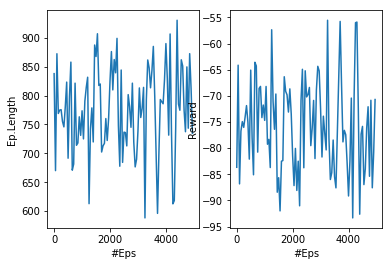

In [4]:
from matplotlib import pyplot as plt
fg, axes = plt.subplots(1, 2)

step = 50
plot_len = list(map(lambda x: np.mean(lengths[x:x+step]), range(0, len(lengths), step)))
plot_rew = list(map(lambda x: np.mean(rewards[x:x+step]), range(0, len(rewards), step)))
axes[0].plot(np.array(list(range(len(plot_len))))*step, plot_len)
axes[0].set_ylabel('Ep.Length')
axes[1].set_ylabel('Reward')
axes[1].plot(np.array(list(range(len(plot_rew))))*step, plot_rew)
axes[0].set_xlabel('#Eps')
axes[1].set_xlabel('#Eps')
plt.show()

In [ ]:
obs = env.reset()
while not done:
    env.render()  # commented to speed up training
    act = init_pol.select_action(obs)
    nobs, r, done, info = env.step(act)
    c_reward += r
#     samples.append(lspi.Sample(obs, act, r, nobs, done))
    obs = nobs

In [ ]:
env.close()

env = gym.make("Taxi-v2")
observation = env.reset()
for _ in range(1000):
  env.render()
  action = env.action_space.sample() # your agent here (this takes random actions)
  observation, reward, done, info = env.step(action)